In [1]:
import os
import pandas as pd
import numpy as np

# read all datasets

In [2]:
RAVDESS = "dataset/RAVDESS/audio_speech_actors_01-24/"
CREMA = "dataset/AudioWAV/"
TESS = "dataset/TESS/TESS Toronto emotional speech set data/"
SAVEE = "dataset/ALL/"
dataset_dir = "dataset/Emotional_Speech_Dataset/" # الباث للداتا سيت العربية لكن لا نستطيع مشاركتها نظرا لطلب الخصوصية من المصدر

In [3]:
ravdess_dir_lis = os.listdir(RAVDESS)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    '03' : 'happy',
    '01' : 'neutral',
    '04' : 'sad',
    '05' : 'angry',
}

for directory in ravdess_dir_lis:
    actor_files = os.listdir(os.path.join(RAVDESS, directory))
    for audio_file in actor_files: 
        part = audio_file.split('.')[0]
        key = part.split('-')[2]
        if key in emotion_dic:
            gender_code = int(part.split('-')[6])
            path_list.append(f"{RAVDESS}{directory}/{audio_file}")
            gender_list.append('female' if gender_code & 1 == 0 else 'male')
            emotion_list.append(emotion_dic[key])
            
ravdess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

ravdess_df.head()

,path,sex,emotion
0,dataset/RAVDESS/audio_speech_actors_01-24/Acto...,female,angry
1,dataset/RAVDESS/audio_speech_actors_01-24/Acto...,female,angry
2,dataset/RAVDESS/audio_speech_actors_01-24/Acto...,female,sad
3,dataset/RAVDESS/audio_speech_actors_01-24/Acto...,female,sad
4,dataset/RAVDESS/audio_speech_actors_01-24/Acto...,female,happy


In [4]:
crema_dir_list = os.listdir(CREMA)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'HAP' : 'happy',
    'NEU' : 'neutral',
    'SAD' : 'sad',
    'ANG' : 'angry',
}

female_id_list = [
    '1002', '1003', '1004', '1006', '1007', '1008', '1009', '1010', '1012', '1013', '1018', 
    '1020', '1021', '1024', '1025', '1028', '1029', '1030', '1037', '1043', '1046', '1047', 
    '1049', '1052', '1053', '1054', '1055', '1056', '1058', '1060', '1061', '1063', '1072', 
    '1073', '1074', '1075', '1076', '1078', '1079', '1082', '1084', '1089', '1091',
]

for audio_file in crema_dir_list:
    part = audio_file.split('_')
    key = part[2]
    if key in emotion_dic and part[3] == 'HI.wav':
        path_list.append(f"{CREMA}{audio_file}")
        gender_list.append('female' if part[0] in female_id_list else 'male')
        emotion_list.append(emotion_dic[key])

crema_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

crema_df.head()

,path,sex,emotion
0,dataset/AudioWAV/1028_IEO_SAD_HI.wav,female,sad
1,dataset/AudioWAV/1048_IEO_ANG_HI.wav,male,angry
2,dataset/AudioWAV/1080_IEO_HAP_HI.wav,male,happy
3,dataset/AudioWAV/1059_IEO_SAD_HI.wav,male,sad
4,dataset/AudioWAV/1039_IEO_ANG_HI.wav,male,angry


In [5]:
tess_dir_list = os.listdir(TESS)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'happy': 'happy',
    'neutral': 'neutral',
    'sad': 'sad',
    'angry': 'angry',
}

for directory in tess_dir_list:
    audio_files = os.listdir(os.path.join(TESS, directory))
    for audio_file in audio_files:
        if not audio_file.endswith('.wav'):  # Skip files that do not have the expected extension
            continue
        part = audio_file.split('.')[0]
        split_parts = part.split('_')
        if len(split_parts) < 3:
            print(f"Invalid audio_file format: {audio_file}")
            continue
        key = split_parts[2]
        if key in emotion_dic:
            path_list.append(f"{TESS}{directory}/{audio_file}")
            gender_list.append('female')  # female only dataset
            emotion_list.append(emotion_dic[key])

tess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)
tess_df.head()


,path,sex,emotion
0,dataset/TESS/TESS Toronto emotional speech set...,female,happy
1,dataset/TESS/TESS Toronto emotional speech set...,female,happy
2,dataset/TESS/TESS Toronto emotional speech set...,female,happy
3,dataset/TESS/TESS Toronto emotional speech set...,female,happy
4,dataset/TESS/TESS Toronto emotional speech set...,female,happy


In [6]:
savee_dir_list = os.listdir(SAVEE)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'h'  : 'happy',
    'n'  : 'neutral',
    'sa' : 'sad',
    'a'  : 'angry',
}

for audio_file in savee_dir_list:
    part = audio_file.split('_')[1]
    key = part[:-6]
    if key in emotion_dic:
        path_list.append(f"{SAVEE}{audio_file}")
        gender_list.append('male') # male only dataset
        emotion_list.append(emotion_dic[key])
        
savee_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

savee_df.head()

,path,sex,emotion
0,dataset/ALL/JK_sa01.wav,male,sad
1,dataset/ALL/JK_sa15.wav,male,sad
2,dataset/ALL/DC_n13.wav,male,neutral
3,dataset/ALL/DC_n07.wav,male,neutral
4,dataset/ALL/JK_n20.wav,male,neutral


In [7]:
#create datafream 
emotion_dir_list = ['Angry', 'Happy', 'Neutral', 'Sad']
emotion_dic = {
    'Angry': 'angry',
    'Happy': 'happy',
    'Neutral': 'neutral',
    'Sad': 'sad',
}

path_list = []
gender_list = []
emotion_list = []

for emotion_dir in emotion_dir_list:
    audio_files = os.listdir(os.path.join(dataset_dir, emotion_dir))
    for audio_file in audio_files:
        part = audio_file.split('.')[0]
        parts = part.split('-')
        if len(parts) >= 3:  # Check if the split parts contain enough information
            key = parts[0]
            gender = parts[-1][0] if len(parts[-1]) > 0 and parts[-1][0] in ['f', 'm'] else ''  # Extract gender from the audio file name
            if key in emotion_dic:
                path_list.append(os.path.join(dataset_dir, emotion_dir, audio_file))
                gender_list.append('female' if gender == 'f' else 'male')
                emotion_list.append(emotion_dic[key])

dataset_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

dataset_df.head()

,path,sex,emotion
0,dataset/Emotional_Speech_Dataset/Angry/Angry-0...,female,angry
1,dataset/Emotional_Speech_Dataset/Angry/Angry-0...,female,angry
2,dataset/Emotional_Speech_Dataset/Angry/Angry-3...,male,angry
3,dataset/Emotional_Speech_Dataset/Angry/Angry-0...,male,angry
4,dataset/Emotional_Speech_Dataset/Angry/Angry-1...,male,angry


# Create the datafream

In [8]:
df = pd.concat([
    ravdess_df, 
    crema_df, 
    tess_df, 
    savee_df,
    dataset_df
], axis=0)
df.head()

,path,sex,emotion
0,dataset/RAVDESS/audio_speech_actors_01-24/Acto...,female,angry
1,dataset/RAVDESS/audio_speech_actors_01-24/Acto...,female,angry
2,dataset/RAVDESS/audio_speech_actors_01-24/Acto...,female,sad
3,dataset/RAVDESS/audio_speech_actors_01-24/Acto...,female,sad
4,dataset/RAVDESS/audio_speech_actors_01-24/Acto...,female,happy


# The 4 EDA steps

In [9]:
df.shape

(3020, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3020 entries, 0 to 174
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   path     3020 non-null   object
 1   sex      3020 non-null   object
 2   emotion  3020 non-null   object
dtypes: object(3)
memory usage: 94.4+ KB


In [11]:
df.describe

<bound method NDFrame.describe of                                                   path     sex emotion
0    dataset/RAVDESS/audio_speech_actors_01-24/Acto...  female   angry
1    dataset/RAVDESS/audio_speech_actors_01-24/Acto...  female   angry
2    dataset/RAVDESS/audio_speech_actors_01-24/Acto...  female     sad
3    dataset/RAVDESS/audio_speech_actors_01-24/Acto...  female     sad
4    dataset/RAVDESS/audio_speech_actors_01-24/Acto...  female   happy
..                                                 ...     ...     ...
170  dataset/Emotional_Speech_Dataset/Sad/Sad-04-04...    male     sad
171  dataset/Emotional_Speech_Dataset/Sad/Sad-08-04...    male     sad
172  dataset/Emotional_Speech_Dataset/Sad/Sad-16-04...    male     sad
173  dataset/Emotional_Speech_Dataset/Sad/Sad-17-04...  female     sad
174  dataset/Emotional_Speech_Dataset/Sad/Sad-16-04...  female     sad

[3020 rows x 3 columns]>

In [12]:
# check missing values in each column
df.isna().sum() 

path       0
sex        0
emotion    0
dtype: int64

----

In [13]:
# !pip install librosa
import librosa
import matplotlib.pyplot as plt
plt.style.use('ggplot')

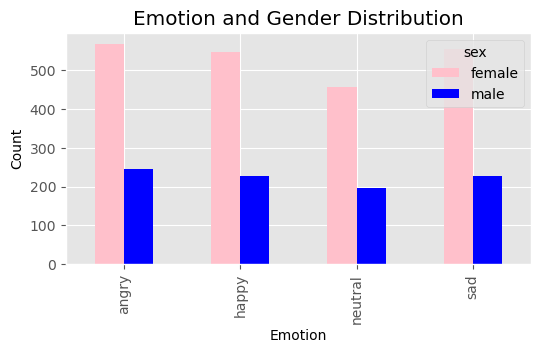

In [14]:
def plot_distribution(df): 
    countTable = df.groupby(['emotion', 'sex']).count()
    pivotTable = countTable.pivot_table(index='emotion', columns='sex', values='path')
    pivotTable.plot(kind='bar', figsize=(6, 3), color=['pink', 'blue'])
    plt.title('Emotion and Gender Distribution')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.show()
plot_distribution(df)

In [15]:
# Count the number of occurrences of each emotion
emotion_counts = df['emotion'].value_counts()
# Print the emotion counts
print(emotion_counts)

angry      812
sad        781
happy      774
neutral    653
Name: emotion, dtype: int64


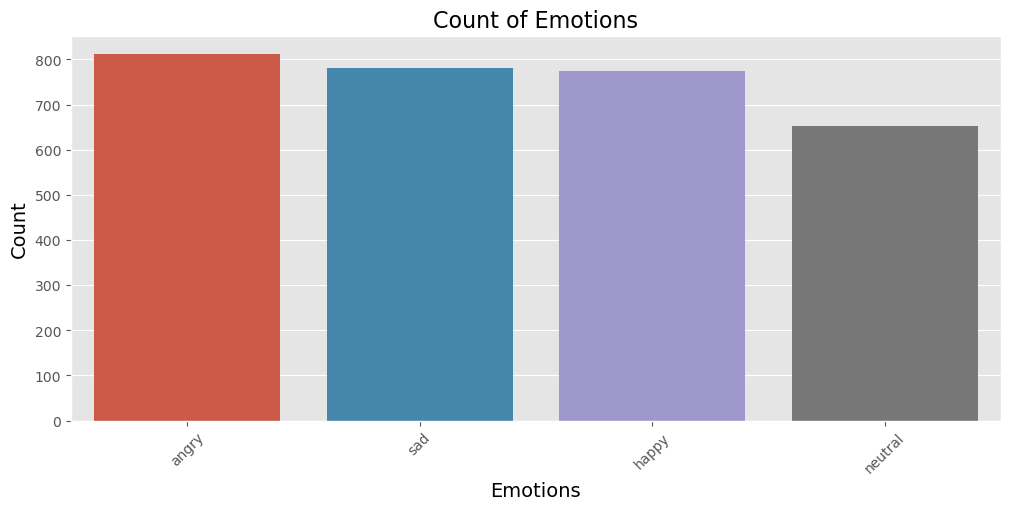

In [16]:
import seaborn as sns
plt.figure(figsize=(12, 5))
plt.title('Count of Emotions', size=16)
sns.countplot(data=df, x='emotion')
plt.ylabel('Count', size=14)
plt.xlabel('Emotions', size=14)
plt.xticks(rotation=45)
plt.show()

# pre-processing

In [17]:
emotion_mapping = {
    'angry': 'negative',
    'sad': 'negative',
    'happy': 'positive',
    'neutral': 'positive'
}
# Replace values in the "emotions" column
df['emotion'] = df['emotion'].map(emotion_mapping)

In [18]:
# Count the number of occurrences of each emotion
emotion_counts = df['emotion'].value_counts()
# Print the emotion counts
print(emotion_counts)

negative    1593
positive    1427
Name: emotion, dtype: int64


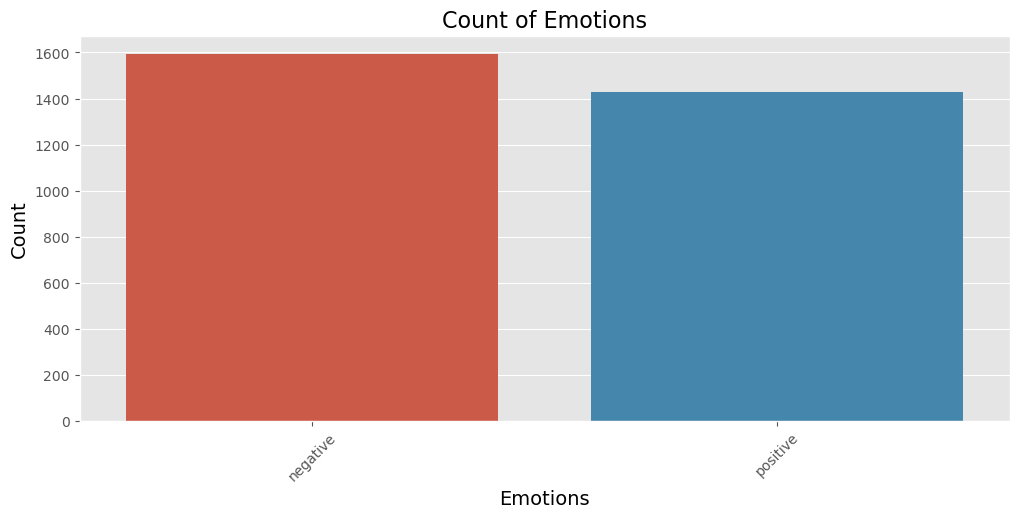

In [19]:
import seaborn as sns
plt.figure(figsize=(12, 5))
plt.title('Count of Emotions', size=16)
sns.countplot(data=df, x='emotion')
plt.ylabel('Count', size=14)
plt.xlabel('Emotions', size=14)
plt.xticks(rotation=45)
plt.show()

In [20]:
df.drop('sex', axis=1, inplace=True)
df.head()

,path,emotion
0,dataset/RAVDESS/audio_speech_actors_01-24/Acto...,negative
1,dataset/RAVDESS/audio_speech_actors_01-24/Acto...,negative
2,dataset/RAVDESS/audio_speech_actors_01-24/Acto...,negative
3,dataset/RAVDESS/audio_speech_actors_01-24/Acto...,negative
4,dataset/RAVDESS/audio_speech_actors_01-24/Acto...,positive


In [21]:
from pydub import AudioSegment, effects
def preprocess_audio(path):
    _, sr = librosa.load(path)
    raw_audio = AudioSegment.from_file(path)
    samples = np.array(raw_audio.get_array_of_samples(), dtype='float32')
   # trimmed, _ = librosa.effects.trim(samples, top_db=25)
    trimmed, _ = librosa.effects.trim(samples, top_db=50)
 #   padded = np.pad(trimmed, (0, 180000-len(trimmed)), 'constant')
    padded = np.pad(trimmed, (0, 300000-len(trimmed)), 'constant')
    return padded, sr

/Users/mac/anaconda3/lib/python3.10/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [22]:
emotion_dic = {
    'positive' : 0,
    'negative'   : 1
}

def encode(label):
    return emotion_dic.get(label)

In [23]:
# pip install --upgrade librosa
zcr_list = []
rms_list = []
mfccs_list = []
emotion_list = []

FRAME_LENGTH = 2048
HOP_LENGTH = 512

for row in df.itertuples(index=False):
    try: 
        y, sr = preprocess_audio(row.path)

        zcr = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        rms = librosa.feature.rms(y=y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=HOP_LENGTH)
        zcr_list.append(zcr)
        rms_list.append(rms)
        mfccs_list.append(mfccs)

        emotion_list.append(encode(row.emotion))
    except:
        print(f"Failed for path: {row.path}")

/Users/mac/anaconda3/lib/python3.10/site-packages/pydub/utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)


Failed for path: dataset/TESS/TESS Toronto emotional speech set data/YAF_angry/YAF_germ_angry.wav
Failed for path: dataset/ALL/JE_sa14.wav
Failed for path: dataset/ALL/JE_a14.wav
Failed for path: dataset/Emotional_Speech_Dataset/Angry/Angry-03-01-f.wav


/var/folders/cc/hrcjmc7j2631f9q1c6_9syfr0000gn/T/ipykernel_81193/1629204816.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  _, sr = librosa.load(path)
/Users/mac/anaconda3/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/Users/mac/anaconda3/lib/python3.10/site-packages/pydub/utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)


Failed for path: dataset/Emotional_Speech_Dataset/Angry/Angry-37-01.wav
Failed for path: dataset/Emotional_Speech_Dataset/Angry/Angry-09-01-f.wav
Failed for path: dataset/Emotional_Speech_Dataset/Angry/Angry-08-01-f.wav
Failed for path: dataset/Emotional_Speech_Dataset/Angry/Angry-29-01.wav
Failed for path: dataset/Emotional_Speech_Dataset/Angry/Angry-35-01.wav
Failed for path: dataset/Emotional_Speech_Dataset/Angry/Angry-20-01-f.wav
Failed for path: dataset/Emotional_Speech_Dataset/Angry/Angry-21-01-f.wav
Failed for path: dataset/Emotional_Speech_Dataset/Angry/Angry-23-01.wav
Failed for path: dataset/Emotional_Speech_Dataset/Angry/Angry-31-01.wav
Failed for path: dataset/Emotional_Speech_Dataset/Angry/Angry-19-01.wav
Failed for path: dataset/Emotional_Speech_Dataset/Angry/Angry-15-01.wav
Failed for path: dataset/Emotional_Speech_Dataset/Angry/Angry-27-01-f.wav
Failed for path: dataset/Emotional_Speech_Dataset/Angry/Angry-19-01-f.wav
Failed for path: dataset/Emotional_Speech_Dataset/An

/var/folders/cc/hrcjmc7j2631f9q1c6_9syfr0000gn/T/ipykernel_81193/1629204816.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  _, sr = librosa.load(path)
/Users/mac/anaconda3/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/Users/mac/anaconda3/lib/python3.10/site-packages/pydub/utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)


Failed for path: dataset/Emotional_Speech_Dataset/Angry/Angry-22-01.wav
Failed for path: dataset/Emotional_Speech_Dataset/Angry/Angry-30-01.wav
Failed for path: dataset/Emotional_Speech_Dataset/Angry/Angry-08-01.wav
Failed for path: dataset/Emotional_Speech_Dataset/Angry/Angry-16-01.wav
Failed for path: dataset/Emotional_Speech_Dataset/Angry/Angry-32-01.wav
Failed for path: dataset/Emotional_Speech_Dataset/Angry/Angry-20-01.wav
Failed for path: dataset/Emotional_Speech_Dataset/Angry/Angry-10-01-f.wav
Failed for path: dataset/Emotional_Speech_Dataset/Angry/Angry-11-01-f.wav
Failed for path: dataset/Emotional_Speech_Dataset/Happy/Happy-03-02.wav
Failed for path: dataset/Emotional_Speech_Dataset/Happy/Happy-11-02.wav
Failed for path: dataset/Emotional_Speech_Dataset/Happy/Happy-08-02-f.wav
Failed for path: dataset/Emotional_Speech_Dataset/Happy/Happy-02-02-f.wav
Failed for path: dataset/Emotional_Speech_Dataset/Happy/Happy-03-02-f.wav
Failed for path: dataset/Emotional_Speech_Dataset/Happ

/var/folders/cc/hrcjmc7j2631f9q1c6_9syfr0000gn/T/ipykernel_81193/1629204816.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  _, sr = librosa.load(path)
/Users/mac/anaconda3/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/Users/mac/anaconda3/lib/python3.10/site-packages/pydub/utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)
/var/folders/cc/hrcjmc7j2631f9q1c6_9syfr0000gn/T/ipykernel_81193/1629204816.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  _, sr = librosa.load(path)
/Users/mac/anaconda3/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audior

Failed for path: dataset/Emotional_Speech_Dataset/Happy/Happy-16-02.wav
Failed for path: dataset/Emotional_Speech_Dataset/Happy/Happy-08-02.wav
Failed for path: dataset/Emotional_Speech_Dataset/Happy/Happy-06-02-f.wav
Failed for path: dataset/Emotional_Speech_Dataset/Happy/Happy-14-02-.wav
Failed for path: dataset/Emotional_Speech_Dataset/Happy/Happy-18-02.wav
Failed for path: dataset/Emotional_Speech_Dataset/Neutral/Neutral-05-03-f.wav
Failed for path: dataset/Emotional_Speech_Dataset/Neutral/Neutral-04-03-f.wav
Failed for path: dataset/Emotional_Speech_Dataset/Neutral/Neutral-19-03.wav
Failed for path: dataset/Emotional_Speech_Dataset/Neutral/Neutral-07-03.wav
Failed for path: dataset/Emotional_Speech_Dataset/Neutral/Neutral-15-03.wav
Failed for path: dataset/Emotional_Speech_Dataset/Neutral/Neutral-23-03.wav
Failed for path: dataset/Emotional_Speech_Dataset/Neutral/Neutral-26-03-.wav
Failed for path: dataset/Emotional_Speech_Dataset/Neutral/Neutral-27-03-.wav
Failed for path: datase

/var/folders/cc/hrcjmc7j2631f9q1c6_9syfr0000gn/T/ipykernel_81193/1629204816.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  _, sr = librosa.load(path)
/Users/mac/anaconda3/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/Users/mac/anaconda3/lib/python3.10/site-packages/pydub/utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)


Failed for path: dataset/Emotional_Speech_Dataset/Neutral/Neutral-20-03.wav
Failed for path: dataset/Emotional_Speech_Dataset/Neutral/Neutral-08-03.wav
Failed for path: dataset/Emotional_Speech_Dataset/Neutral/Neutral-16-03.wav
Failed for path: dataset/Emotional_Speech_Dataset/Neutral/Neutral-04-03.wav
Failed for path: dataset/Emotional_Speech_Dataset/Neutral/Neutral-06-03-f.wav
Failed for path: dataset/Emotional_Speech_Dataset/Neutral/Neutral-07-03-f.wav
Failed for path: dataset/Emotional_Speech_Dataset/Neutral/Neutral-12-03.wav
Failed for path: dataset/Emotional_Speech_Dataset/Neutral/Neutral-24-03.wav
Failed for path: dataset/Emotional_Speech_Dataset/Neutral/Neutral-10-03.wav
Failed for path: dataset/Emotional_Speech_Dataset/Sad/Sad-04-04-f.wav
Failed for path: dataset/Emotional_Speech_Dataset/Sad/Sad-05-04-f.wav
Failed for path: dataset/Emotional_Speech_Dataset/Sad/Sad-13-04.wav
Failed for path: dataset/Emotional_Speech_Dataset/Sad/Sad-13-04-f.wav
Failed for path: dataset/Emotional

/var/folders/cc/hrcjmc7j2631f9q1c6_9syfr0000gn/T/ipykernel_81193/1629204816.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  _, sr = librosa.load(path)
/Users/mac/anaconda3/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/Users/mac/anaconda3/lib/python3.10/site-packages/pydub/utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)
/var/folders/cc/hrcjmc7j2631f9q1c6_9syfr0000gn/T/ipykernel_81193/1629204816.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  _, sr = librosa.load(path)
/Users/mac/anaconda3/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audior

Failed for path: dataset/Emotional_Speech_Dataset/Sad/Sad-07-04.wav
Failed for path: dataset/Emotional_Speech_Dataset/Sad/Sad-02-04-f.wav
Failed for path: dataset/Emotional_Speech_Dataset/Sad/Sad-05-04.wav
Failed for path: dataset/Emotional_Speech_Dataset/Sad/Sad-09-04-f.wav
Failed for path: dataset/Emotional_Speech_Dataset/Sad/Sad-08-04-f.wav
Failed for path: dataset/Emotional_Speech_Dataset/Sad/Sad-17-04.wav
Failed for path: dataset/Emotional_Speech_Dataset/Sad/Sad-09-04.wav
Failed for path: dataset/Emotional_Speech_Dataset/Sad/Sad-21-04.wav
Failed for path: dataset/Emotional_Speech_Dataset/Sad/Sad-12-04.wav
Failed for path: dataset/Emotional_Speech_Dataset/Sad/Sad-10-04-f.wav
Failed for path: dataset/Emotional_Speech_Dataset/Sad/Sad-11-04-f.wav
Failed for path: dataset/Emotional_Speech_Dataset/Sad/Sad-02-04.wav
Failed for path: dataset/Emotional_Speech_Dataset/Sad/Sad-10-04.wav
Failed for path: dataset/Emotional_Speech_Dataset/Sad/Sad-06-04-f.wav
Failed for path: dataset/Emotional_S

/var/folders/cc/hrcjmc7j2631f9q1c6_9syfr0000gn/T/ipykernel_81193/1629204816.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  _, sr = librosa.load(path)
/Users/mac/anaconda3/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/Users/mac/anaconda3/lib/python3.10/site-packages/pydub/utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)
/var/folders/cc/hrcjmc7j2631f9q1c6_9syfr0000gn/T/ipykernel_81193/1629204816.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  _, sr = librosa.load(path)
/Users/mac/anaconda3/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audior

In [24]:
X = np.concatenate((
    np.swapaxes(zcr_list, 1, 2), 
    np.swapaxes(rms_list, 1, 2), 
    np.swapaxes(mfccs_list, 1, 2)), 
    axis=2
)
X = X.astype('float32')
y = np.asarray(emotion_list)
y = np.expand_dims(y, axis=1).astype('int8')

In [28]:
# !pip install tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
X_train, X_to_split, y_train, y_to_split = train_test_split(X, y, test_size=0.15, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_to_split, y_to_split, test_size=0.3, random_state=1)
y_train_class = to_categorical(y_train, 2)
y_val_class = to_categorical(y_val, 2)

In [29]:
from keras.models import Sequential
from keras import layers, optimizers, callbacks
MODEL = Sequential()
MODEL.add(layers.LSTM(128, return_sequences=True, input_shape=(X.shape[1:3])))
MODEL.add(layers.LSTM(128))
MODEL.add(layers.Dense(2, activation='softmax'))
print(MODEL.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 586, 128)          73728     
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 205570 (803.01 KB)
Trainable params: 205570 (803.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [30]:
# 89 acc
rlrop = callbacks.ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.2, patience=70)
MODEL.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['categorical_accuracy'])
model = MODEL.fit(X_train, y_train_class, epochs=100, batch_size= 32, validation_data=(X_val, y_val_class))

Epoch 1/100
78/78 [==============================] - 38s 471ms/step - loss: 0.6893 - categorical_accuracy: 0.5740 - val_loss: 0.8639 - val_categorical_accuracy: 0.4787
Epoch 2/100
78/78 [==============================] - 37s 471ms/step - loss: 0.6404 - categorical_accuracy: 0.6475 - val_loss: 0.6508 - val_categorical_accuracy: 0.6295
Epoch 3/100
78/78 [==============================] - 36s 464ms/step - loss: 0.6135 - categorical_accuracy: 0.6799 - val_loss: 0.6838 - val_categorical_accuracy: 0.6328
Epoch 4/100
78/78 [==============================] - 37s 468ms/step - loss: 0.5749 - categorical_accuracy: 0.7112 - val_loss: 0.6572 - val_categorical_accuracy: 0.6689
Epoch 5/100
78/78 [==============================] - 37s 480ms/step - loss: 0.5658 - categorical_accuracy: 0.7258 - val_loss: 0.5727 - val_categorical_accuracy: 0.6656
Epoch 6/100
78/78 [==============================] - 37s 473ms/step - loss: 0.5501 - categorical_accuracy: 0.7359 - val_loss: 0.6428 - val_categorical_accuracy:

78/78 [==============================] - 36s 466ms/step - loss: 0.2217 - categorical_accuracy: 0.9095 - val_loss: 0.3742 - val_categorical_accuracy: 0.8492
Epoch 98/100
78/78 [==============================] - 36s 466ms/step - loss: 0.1989 - categorical_accuracy: 0.9144 - val_loss: 0.4709 - val_categorical_accuracy: 0.8459
Epoch 99/100
78/78 [==============================] - 36s 465ms/step - loss: 0.2262 - categorical_accuracy: 0.8990 - val_loss: 0.5070 - val_categorical_accuracy: 0.8000
Epoch 100/100
78/78 [==============================] - 36s 465ms/step - loss: 0.2118 - categorical_accuracy: 0.9128 - val_loss: 0.3688 - val_categorical_accuracy: 0.8492


In [29]:
from sklearn.metrics import confusion_matrix

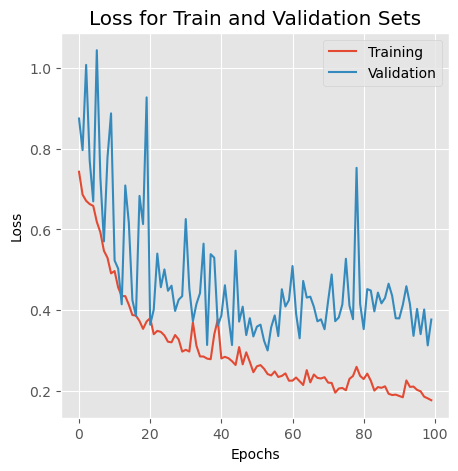

In [30]:
plt.figure(figsize=(5, 5)) 
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Loss for Train and Validation Sets')
plt.ylabel('Loss') 
plt.xlabel('Epochs')
plt.legend(['Training','Validation']) 
plt.show()

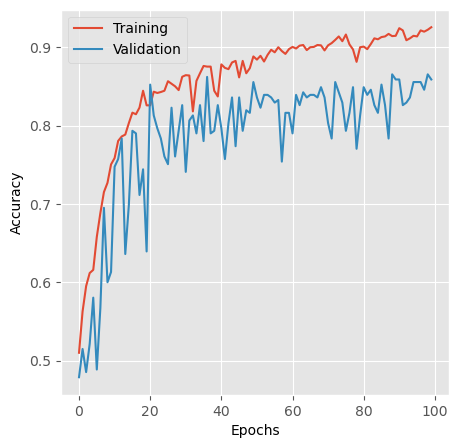

In [31]:
plt.figure(figsize=(5, 5)) 
plt.plot(model.history['categorical_accuracy'])
plt.plot(model.history['val_categorical_accuracy'])
plt.ylabel('Accuracy') 
plt.xlabel('Epochs') 
plt.legend(['Training','Validation']) 
plt.show()

In [35]:
accuracy = np.trace(cm) / np.sum(cm)
precision = cm[1, 1] / np.sum(cm[:, 1])
recall = cm[1, 1] / np.sum(cm[1, :])
f1 = 2 * (precision * recall) / (precision + recall)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8590163934426229
Precision: 0.8670886075949367
Recall: 0.8616352201257862
F1 Score: 0.8643533123028392


In [36]:
# !pip install soundfile

In [37]:
# !pip install sounddevice

In [38]:
# !pip install wavio

In [39]:
# !pip install sounddvice

In [106]:
import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv
# Sampling frequency
freq = 44100

# Recording duration
duration = 4

# Start recorder with the given values
# of duration and sample frequency
recording = sd.rec(int(duration * freq), samplerate=freq, channels=1)

# Record audio for the given number of seconds
sd.wait()

# This will convert the NumPy array to an audio
# file with the given sampling frequency
write("recording0.wav", freq, recording)
wv.write("recording1.wav", recording, freq, sampwidth=2)

/Users/mac/anaconda3/lib/python3.10/site-packages/wavio.py:259: ClippedDataWarning: Some data values have been clipped.  With scale=1.0, the interval of input values that will not be clipped is [-1.0000305180437934, 1.0]
  _warnings.warn(ClippedDataWarning(msg))


In [107]:
zcr_list = []
rms_list = []
mfccs_list = []


FRAME_LENGTH = 2048
HOP_LENGTH = 512

y, sr = preprocess_audio("recording1.wav")

zcr = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
rms = librosa.feature.rms(y=y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=HOP_LENGTH)

zcr_list.append(zcr)
rms_list.append(rms)
mfccs_list.append(mfccs)

In [108]:
X = np.concatenate((
    np.swapaxes(zcr_list, 1, 2), 
    np.swapaxes(rms_list, 1, 2), 
    np.swapaxes(mfccs_list, 1, 2)), 
    axis=2
)
X = X.astype('float32')
y = np.asarray(emotion_list)
y = np.expand_dims(y, axis=1).astype('int8')

In [109]:
y_pred = np.argmax(MODEL.predict(X), axis=1)

1/1 [==============================] - 0s 42ms/step


In [110]:
y_pred[0]

0